In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_ih = np.random.randn(self.hidden_size, self.input_size)
        self.bias_h = np.zeros((self.hidden_size, 1))
        self.weights_ho = np.random.randn(self.output_size, self.hidden_size)
        self.bias_o = np.zeros((self.output_size, 1))
    
    def sigmoid(self, x):
        '''used to introduce non-linearity into the network.'''

        return 1 / (1 + np.exp(-x))
    
    def forward(self, inputs):
        '''computes the output for given inputs.'''

        # Convert inputs to 2D array
        inputs = np.array(inputs, ndmin=2).T
        
        # Calculate hidden layer
        hidden = self.sigmoid(np.dot(self.weights_ih, inputs) + self.bias_h)
        
        # Calculate output layer
        output = self.sigmoid(np.dot(self.weights_ho, hidden) + self.bias_o)
        
        return output
    
    def grow_network(self, new_neurons):
        '''used to add new neurons to the hidden layer, simulating neurogenesis.'''

        # Increase hidden layer size
        new_hidden_size = self.hidden_size + new_neurons
        
        # Create new weights and biases
        new_weights_ih = np.random.randn(new_neurons, self.input_size)
        new_bias_h = np.zeros((new_neurons, 1))
        new_weights_ho = np.random.randn(self.output_size, new_neurons)
        
        # Combine old and new weights/biases
        self.weights_ih = np.vstack((self.weights_ih, new_weights_ih))
        self.bias_h = np.vstack((self.bias_h, new_bias_h))
        self.weights_ho = np.hstack((self.weights_ho, new_weights_ho))
        
        # Update hidden size
        self.hidden_size = new_hidden_size

# Create a simple dataset
X = np.linspace(0, 10, 100)
y = np.sin(X)

# Initialize the network
nn = SimpleNeuralNetwork(1, 5, 1)


In [2]:

# Train the network (simplified for demonstration)
epochs = 1000
learning_rate = 0.1
errors = []

for _ in range(epochs):
    total_error = 0
    for i in range(len(X)):
        # Forward pass
        output = nn.forward([X[i]])
        
        # Calculate error
        error = y[i] - output[0][0]
        total_error += error ** 2
        
        # Backpropagation (simplified)
        nn.weights_ho += learning_rate * error * output * (1 - output) * nn.weights_ih.T
    
    errors.append(total_error / len(X))
    
    # Grow network every 200 epochs
    if _ % 200 == 0:
        nn.grow_network(1)

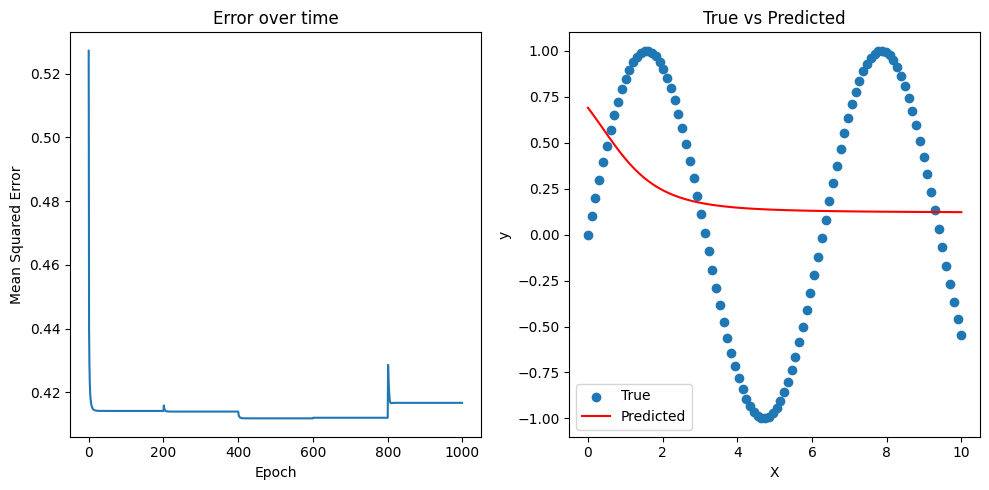

In [3]:

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), errors)
plt.title('Error over time')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.scatter(X, y, label='True')
predictions = [nn.forward([x])[0][0] for x in X]
plt.plot(X, predictions, label='Predicted', color='red')
plt.title('True vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()